<a href="https://colab.research.google.com/github/geosefuy/sthciux-cashless/blob/master/%5BSTHCIUX%5D%20Needfinding%20Study%20Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re, string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob
from nltk.tag import pos_tag

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
url = 'https://raw.githubusercontent.com/geosefuy/sthciux-cashless/master/cashless.csv'
responses_df = pd.read_csv(url)
responses_df

,Timestamp,Are you willing to participate in a separate interview session for the research at hand?,Contact Number,Email Address,Sex,Current Level of Education,Type of Institution,Average Monthly Allowance (PHP),Do you have a credit / debit card?,How often do you use your credit / debit card for payment transactions per month?,"Do you have a payment application (e.g. GCash, PayMaya)?",How often do you use these applications for payment transactions per month?,"On average, how often do use cashless transactions systems in your payment transactions per month?",On what type of transactions do you usually use cashless transactions systems. Select all that apply. (Answer N/A if you always pay in cash),"On average, how often do you encounter establishments that have cashless transactions systems per month?","From what you know or have encountered, which of the following establishments implement cashless transaction systems?","On average, how would you rate current cashless transaction systems?","In your opinion, what are the possible advantages when more people use cashless systems?","In your opinion, what are the possible disadvantages when more people use cashless systems?",Which of the following establishments do you want to implement / maintain cashless transaction systems? (Select all that apply)
0,11/12/2020 14:22:32,Yes,09171054000,shannon_gail_ho@dlsu.edu.ph,Female,Undergraduate,Private School / University,"1,000 - 4,999",Yes,4 times or less,Yes,5 - 7 times,5 - 7 times,"Food and Groceries, Office/School Supplies, Ce...",8 - 10 times,"Supermarkets, Appliance Centers, Online Stores",8,More efficient and faster process,Not all are capable of using them and some are...,"Supermarkets, Convenience Stores, Payment Cent..."
1,11/12/2020 14:29:15,No,NaN,NaN,Male,Undergraduate,Private School / University,"Below 1,000",No,4 times or less,Yes,4 times or less,4 times or less,"Cellular Load, Games/Movies/Entertainment",4 times or less,"Convenience Stores, Payment Centers, Fast Food...",6,There's the convenience of having your money d...,There's both an upside and downside to securit...,"Supermarkets, Convenience Stores, Sari-sari St..."
2,11/12/2020 14:37:57,Yes,09052803070,gab_delacruz@dlsu.edu.ph,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,4 times or less,Yes,8 - 10 times,5 - 7 times,"Food and Groceries, Office/School Supplies, Ce...",5 - 7 times,"Supermarkets, Department Stores, Appliance Cen...",9,"Less human contact, especially during the pand...","Prone to it being hacked, delay in arrival of ...","Supermarkets, Department Stores, Appliance Cen..."
3,11/12/2020 14:44:33,No,NaN,NaN,Female,Undergraduate,Private School / University,"8,000 - 11,999",Yes,4 times or less,Yes,11 - 14 times,11 - 14 times,"Cellular Load, Games/Movies/Entertainment, ele...",8 - 10 times,"Supermarkets, Convenience Stores, Department S...",6,"Society can progress, and more attention can b...",People would have to adjust to the new norm. T...,"Supermarkets, Convenience Stores, Sari-sari St..."
4,11/12/2020 14:51:18,Yes,09177199289,richard_zapanta@dlsu.edu.ph,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,4 times or less,No,NaN,4 times or less,"Food and Groceries, Appliances",5 - 7 times,"Supermarkets, Department Stores, Appliance Cen...",6,It is less hassle to bring cash and it would a...,It would be hard for those who don’t have any ...,"Supermarkets, Convenience Stores, Department S..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,11/23/2020 22:04:24,Yes,09175278590,antonellosantos8@gmail.com,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,4 times or less,Yes,4 times or less,15 times or more,"Food and Groceries, Office/School Supplies, Ga...",8 - 10 times,"Supermarkets, Convenience Stores, Department S...",8,"Given the current pandemic, it lessens the tra...",The time it takes to verify the transactions m...,"Supermarkets, Convenience Stores, Sari-sari St...

#Drop unneeded data

In [ ]:
responses_df = responses_df.drop(['Timestamp', 'Are you willing to participate in a separate interview session for the research at hand?', 'Contact Number', 'Email Address'], axis=1)

#Rename questions to shorter column names

In [ ]:
responses_df.rename(columns = {'Average Monthly Allowance (PHP)': 'allowance', 'Do you have a credit / debit card?': 'card_use', 'How often do you use your credit / debit card for payment transactions per month?': 'card_usage'}, inplace=True)
responses_df.rename(columns = {'Do you have a payment application (e.g. GCash, PayMaya)?': 'pay_app_use', 'How often do you use these applications for payment transactions per month?': 'pay_app_usage', 'On average, how often do use cashless transactions systems in your payment transactions per month?': 'cashless_usage'}, inplace=True)
responses_df.rename(columns = {'On what type of transactions do you usually use cashless transactions systems. Select all that apply. (Answer N/A if you always pay in cash)':'cashless_use_type', 'On average, how often do you encounter establishments that have cashless transactions systems per month?': 'cashless_encounter'}, inplace=True)
responses_df.rename(columns = {'From what you know or have encountered, which of the following establishments implement cashless transaction systems?': 'cashless_implement', 'On average, how would you rate current cashless transaction systems?': 'rating', 'Which of the following establishments do you want to implement / maintain cashless transaction systems? (Select all that apply)': 'cashless_implement_want'}, inplace=True)
responses_df.rename(columns = {'In your opinion, what are the possible advantages when more people use cashless systems?': 'advantages', 'In your opinion, what are the possible disadvantages when more people use cashless systems?': 'disadvantages'}, inplace=True)
responses_df

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_use_type,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want
0,Female,Undergraduate,Private School / University,"1,000 - 4,999",Yes,4 times or less,Yes,5 - 7 times,5 - 7 times,"Food and Groceries, Office/School Supplies, Ce...",8 - 10 times,"Supermarkets, Appliance Centers, Online Stores",8,More efficient and faster process,Not all are capable of using them and some are...,"Supermarkets, Convenience Stores, Payment Cent..."
1,Male,Undergraduate,Private School / University,"Below 1,000",No,4 times or less,Yes,4 times or less,4 times or less,"Cellular Load, Games/Movies/Entertainment",4 times or less,"Convenience Stores, Payment Centers, Fast Food...",6,There's the convenience of having your money d...,There's both an upside and downside to securit...,"Supermarkets, Convenience Stores, Sari-sari St..."
2,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,4 times or less,Yes,8 - 10 times,5 - 7 times,"Food and Groceries, Office/School Supplies, Ce...",5 - 7 times,"Supermarkets, Department Stores, Appliance Cen...",9,"Less human contact, especially during the pand...","Prone to it being hacked, delay in arrival of ...","Supermarkets, Department Stores, Appliance Cen..."
3,Female,Undergraduate,Private School / University,"8,000 - 11,999",Yes,4 times or less,Yes,11 - 14 times,11 - 14 times,"Cellular Load, Games/Movies/Entertainment, ele...",8 - 10 times,"Supermarkets, Convenience Stores, Department S...",6,"Society can progress, and more attention can b...",People would have to adjust to the new norm. T...,"Supermarkets, Convenience Stores, Sari-sari St..."
4,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,4 times or less,No,NaN,4 times or less,"Food and Groceries, Appliances",5 - 7 times,"Supermarkets, Department Stores, Appliance Cen...",6,It is less hassle to bring cash and it would a...,It would be hard for those who don’t have any ...,"Supermarkets, Convenience Stores, Department S..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,4 times or less,Yes,4 times or less,15 times or more,"Food and Groceries, Office/School Supplies, Ga...",8 - 10 times,"Supermarkets, Convenience Stores, Department S...",8,"Given the current pandemic, it lessens the tra...",The time it takes to verify the transactions m...,"Supermarkets, Convenience Stores, Sari-sari St..."
64,Male,Undergraduate,Private School / University,"5,000 - 7,999",Yes,4 times or less,Yes,5 - 7 times,4 times or less,"N/A (I always pay in cash), Food and Groceries",5 - 7 times,"Supermarkets, Convenience Stores, Sari-sari st...",6,"Given the pandemic, it would help have less co...",Sometimes it is dependent on the net and the a...,"Supermarkets, Convenience Stores, Sari-sari St..."
65,Female,Undergraduate,Private School / University,"Below 1,000",Yes,4 times or less,Yes,4 times or less,4 times or less,Tuition Fees,4 times or less,"Supermarkets, Department Stores, Payment Cente...",6,"Convenient and since it's the pandemic period,...",It's hard for those who don't have mobile phon...,"Supermarkets, Convenience Stores, Payment Cent..."
66,Female,Undergraduate,Private School / University,"Below 1,000",Yes,4 times or less,Yes,4 times or less,4 times or less,"Food and Groceries, Office/School Supplies, On...",5 - 7 times,"Supermarkets, Department Stores, Appliance Cen...",8,More hygienic and efficient (no need to waste ...,Dependency on the more known companies may cre...,"Supermarkets, Department Stores, Appliance Cen..."


#Replace binned data removing redundant strings

In [ ]:
responses_df['card_usage'] = responses_df['card_usage'].str.replace('4 times or less', '1 - 4')
responses_df['pay_app_usage'] = responses_df['pay_app_usage'].str.replace('4 times or less', '1 - 4')
responses_df['cashless_usage'] = responses_df['cashless_usage'].str.replace('4 times or less', '1 - 4')
responses_df['cashless_encounter'] = responses_df['cashless_encounter'].str.replace('4 times or less', '1 - 4')
responses_df['card_usage'] = responses_df['card_usage'].str.replace('15 times or more', '> 15')
responses_df['pay_app_usage'] = responses_df['pay_app_usage'].str.replace('15 times or more', '> 15')
responses_df['cashless_usage'] = responses_df['cashless_usage'].str.replace('15 times or more', '> 15')
responses_df['cashless_encounter'] = responses_df['cashless_encounter'].str.replace('15 times or more', '> 15')
responses_df['card_usage'] = responses_df['card_usage'].str.replace(' times', '')
responses_df['pay_app_usage'] = responses_df['pay_app_usage'].str.replace(' times', '')
responses_df['cashless_usage'] = responses_df['cashless_usage'].str.replace(' times', '')
responses_df['cashless_encounter'] = responses_df['cashless_encounter'].str.replace(' times', '')
opinions_df = responses_df
responses_df

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_use_type,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want
0,Female,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,Yes,5 - 7,5 - 7,"Food and Groceries, Office/School Supplies, Ce...",8 - 10,"Supermarkets, Appliance Centers, Online Stores",8,More efficient and faster process,Not all are capable of using them and some are...,"Supermarkets, Convenience Stores, Payment Cent..."
1,Male,Undergraduate,Private School / University,"Below 1,000",No,1 - 4,Yes,1 - 4,1 - 4,"Cellular Load, Games/Movies/Entertainment",1 - 4,"Convenience Stores, Payment Centers, Fast Food...",6,There's the convenience of having your money d...,There's both an upside and downside to securit...,"Supermarkets, Convenience Stores, Sari-sari St..."
2,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,Yes,8 - 10,5 - 7,"Food and Groceries, Office/School Supplies, Ce...",5 - 7,"Supermarkets, Department Stores, Appliance Cen...",9,"Less human contact, especially during the pand...","Prone to it being hacked, delay in arrival of ...","Supermarkets, Department Stores, Appliance Cen..."
3,Female,Undergraduate,Private School / University,"8,000 - 11,999",Yes,1 - 4,Yes,11 - 14,11 - 14,"Cellular Load, Games/Movies/Entertainment, ele...",8 - 10,"Supermarkets, Convenience Stores, Department S...",6,"Society can progress, and more attention can b...",People would have to adjust to the new norm. T...,"Supermarkets, Convenience Stores, Sari-sari St..."
4,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,No,NaN,1 - 4,"Food and Groceries, Appliances",5 - 7,"Supermarkets, Department Stores, Appliance Cen...",6,It is less hassle to bring cash and it would a...,It would be hard for those who don’t have any ...,"Supermarkets, Convenience Stores, Department S..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,Yes,1 - 4,> 15,"Food and Groceries, Office/School Supplies, Ga...",8 - 10,"Supermarkets, Convenience Stores, Department S...",8,"Given the current pandemic, it lessens the tra...",The time it takes to verify the transactions m...,"Supermarkets, Convenience Stores, Sari-sari St..."
64,Male,Undergraduate,Private School / University,"5,000 - 7,999",Yes,1 - 4,Yes,5 - 7,1 - 4,"N/A (I always pay in cash), Food and Groceries",5 - 7,"Supermarkets, Convenience Stores, Sari-sari st...",6,"Given the pandemic, it would help have less co...",Sometimes it is dependent on the net and the a...,"Supermarkets, Convenience Stores, Sari-sari St..."
65,Female,Undergraduate,Private School / University,"Below 1,000",Yes,1 - 4,Yes,1 - 4,1 - 4,Tuition Fees,1 - 4,"Supermarkets, Department Stores, Payment Cente...",6,"Convenient and since it's the pandemic period,...",It's hard for those who don't have mobile phon...,"Supermarkets, Convenience Stores, Payment Cent..."
66,Female,Undergraduate,Private School / University,"Below 1,000",Yes,1 - 4,Yes,1 - 4,1 - 4,"Food and Groceries, Office/School Supplies, On...",5 - 7,"Supermarkets, Department Stores, Appliance Cen...",8,More hygienic and efficient (no need to waste ...,Dependency on the more known companies may cre...,"Supermarkets, Department Stores, Appliance Cen..."


# One-hot Encoding on `cashless_use_type`, `cashless_implement`, and `cashless_implement_want`

In [ ]:
cleaned = responses_df.cashless_use_type.str.split(', ', expand=True).stack()
cleaned

0   0        Food and Groceries
    1    Office/School Supplies
    2             Cellular Load
    3                  Clothing
1   0             Cellular Load
                  ...          
66  1    Office/School Supplies
    2           Online Shopping
67  0        Food and Groceries
    1             Cellular Load
    2                  Clothing
Length: 158, dtype: object

In [ ]:
one_hot_use_type = pd.get_dummies(cleaned, prefix='use_type').groupby(level=0).sum()
one_hot_use_type

,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
66,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
cleaned = responses_df.cashless_implement.str.split(', ', expand=True).stack()
one_hot_implement = pd.get_dummies(cleaned, prefix='implement').groupby(level=0).sum()
cleaned = responses_df.cashless_implement_want.str.split(', ', expand=True).stack()
one_hot_want = pd.get_dummies(cleaned, prefix='implement_want').groupby(level=0).sum()

In [ ]:
one_hot_use_type

,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
66,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
one_hot_implement

,implement_Appliance Centers,implement_Convenience Stores,implement_Department Stores,implement_Fast Food Chains,implement_Food delivery services,implement_Jeepneys,implement_Online Stores,implement_Payment Centers,implement_Private Transportation (Taxis,implement_Public Transportation (Buses,implement_Rail Systems),implement_Restaurants,implement_Sari-sari stores,implement_Supermarkets,implement_TNVS)
0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0
2,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0
3,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0
4,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1,1,1,1,1,0,1,1,0,0,0,1,0,1,0
64,0,1,1,1,1,0,1,1,0,0,0,1,1,1,0
65,0,0,1,0,1,1,1,1,0,1,1,0,0,1,0
66,1,0,1,1,1,0,1,1,0,0,0,1,0,1,0


In [ ]:
one_hot_want

,implement_want_Appliance Centers,implement_want_Convenience Stores,implement_want_Department Stores,implement_want_Donation drives,implement_want_Fast Food Chains,implement_want_Food Delivery Services,implement_want_Jeepneys,implement_want_Online Stores,implement_want_Payment Centers,implement_want_Pharmacies,implement_want_Private Transportation (Taxis,implement_want_Public Transportation (Buses,implement_want_Rail Systems),implement_want_Restaurants,implement_want_Sari-sari Stores,implement_want_Schools,implement_want_Supermarkets,implement_want_TNVS),implement_want_most have cashless maybe sari sari but i think it's impossible
0,0,1,0,0,0,1,1,1,1,0,1,1,1,0,0,0,1,1,0
1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0
2,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,1,0
3,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0
4,1,1,1,0,1,1,1,1,0,0,1,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0
64,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0
65,0,1,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0
66,1,0,1,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0


In [ ]:
response_use_type = responses_df.join(one_hot_use_type)
response_use_type = response_use_type.drop('cashless_use_type', axis=1)
response_use_type

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
0,Female,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,Yes,5 - 7,5 - 7,8 - 10,"Supermarkets, Appliance Centers, Online Stores",8,More efficient and faster process,Not all are capable of using them and some are...,"Supermarkets, Convenience Stores, Payment Cent...",0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Male,Undergraduate,Private School / University,"Below 1,000",No,1 - 4,Yes,1 - 4,1 - 4,1 - 4,"Convenience Stores, Payment Centers, Fast Food...",6,There's the convenience of having your money d...,There's both an upside and downside to securit...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,Yes,8 - 10,5 - 7,5 - 7,"Supermarkets, Department Stores, Appliance Cen...",9,"Less human contact, especially during the pand...","Prone to it being hacked, delay in arrival of ...","Supermarkets, Department Stores, Appliance Cen...",0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Female,Undergraduate,Private School / University,"8,000 - 11,999",Yes,1 - 4,Yes,11 - 14,11 - 14,8 - 10,"Supermarkets, Convenience Stores, Department S...",6,"Society can progress, and more attention can b...",People would have to adjust to the new norm. T...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,No,NaN,1 - 4,5 - 7,"Supermarkets, Department Stores, Appliance Cen...",6,It is less hassle to bring cash and it would a...,It would be hard for those who don’t have any ...,"Supermarkets, Convenience Stores, Department S...",0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,Yes,1 - 4,> 15,8 - 10,"Supermarkets, Convenience Stores, Department S...",8,"Given the current pandemic, it lessens the tra...",The time it takes to verify the transactions m...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
64,Male,Undergraduate,Private School / University,"5,000 - 7,999",Yes,1 - 4,Yes,5 - 7,1 - 4,5 - 7,"Supermarkets, Convenience Stores, Sari-sari st...",6,"Given the pandemic, it would help have less co...",Sometimes it is dependent on the net and the a...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
65,Female,Undergraduate,Private School / University,"Below 1,000",Yes,1 - 4,Yes,1 - 4,1 - 4,1 - 4,"Supermarkets, Department Stores, Payment Cente...",6,"Convenient and since it's the pandemic period,...",It's hard for those who don't have mobile phon...,"Supermarkets, Convenience Stores, Payment Cent...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
66,Female,Undergraduate,Private School / University,"Below 1,000",Yes,1 - 4,Yes,1 - 4,1 - 4,5 - 7,"Supermarkets, Department Stores, Appliance Cen...",8,More hygienic and efficient (no need to waste ...,Dependency on the more known companies may cre...,"Supermarkets, Department Stores, Applia

# Exploratory Data Analysis

## Dividing Students into Financial Brackets
When looking at the survey's overview, the proponents wanted to identify the habits of the students in terms of using cashless systems and its methods. However, since there can be various types of students with different financial standings, dividing them and finding habits for those specific groups will be done instead.

In [ ]:
responses_df['allowance'].unique()

array(['1,000 - 4,999', 'Below 1,000', '8,000 - 11,999', '5,000 - 7,999',
       '15,000 - 19,999', '12,000 - 14,999', '25,000 and above'],
      dtype=object)

In [ ]:
_999 = response_use_type[response_use_type['allowance'] == 'Below 1,000']
_1000_4999 = response_use_type[response_use_type['allowance'] == '1,000 - 4,999']
_5000_7999 = response_use_type[response_use_type['allowance'] == '5,000 - 7,999']
_8000_11999 = response_use_type[response_use_type['allowance'] == '8,000 - 11,999']
_12000_14999 = response_use_type[response_use_type['allowance'] == '12,000 - 14,999']
_15000_19999 = response_use_type[response_use_type['allowance'] == '15,000 - 19,999']
_25000 = response_use_type[response_use_type['allowance'] == '25,000 and above']




*  For those who use cards, what do they spend on usually?
*  For those who use payment apps, what do they spend on usually?
*  For those who use both



In [ ]:
use_type_columns = [col for col in response_use_type if col.startswith('use_type')]
use_type_columns

['use_type_Anything that’s purchase online ',
 'use_type_Appliances',
 'use_type_Books',
 'use_type_Cellular Load',
 'use_type_Clothing',
 'use_type_Delivery / Receiving payments',
 'use_type_Donation',
 'use_type_Food and Groceries',
 'use_type_Games/Movies/Entertainment',
 'use_type_Money transfer',
 'use_type_N/A (I always pay in cash)',
 'use_type_Office/School Supplies',
 'use_type_Online Shopping',
 'use_type_Online Subscriptions',
 'use_type_Recreational Equipment ',
 'use_type_Tech stuff: mouse',
 'use_type_Tuition Fee',
 'use_type_Tuition Fees',
 'use_type_electricity',
 'use_type_keyboards',
 'use_type_lazada ',
 'use_type_pen tabs']

### Below 1000 bracket

In [ ]:
_999card = _999[(_999['card_use'] == 'Yes') &( _999['pay_app_use'] == 'No')]
_999card

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs


In [ ]:
_999pay_app = _999[(_999['card_use'] == 'No') &( _999['pay_app_use'] == 'Yes')]
_999pay_app

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
1,Male,Undergraduate,Private School / University,"Below 1,000",No,1 - 4,Yes,1 - 4,1 - 4,1 - 4,"Convenience Stores, Payment Centers, Fast Food...",6,There's the convenience of having your money d...,There's both an upside and downside to securit...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
22,Male,Undergraduate,Private School / University,"Below 1,000",No,NaN,Yes,1 - 4,1 - 4,1 - 4,"Supermarkets, Convenience Stores, Department S...",10,Convenience and mobility,"If you dont have internet/data, it’s quite har...","Supermarkets, Department Stores, Appliance Cen...",0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
57,Female,Undergraduate,Public School / University,"Below 1,000",No,NaN,Yes,1 - 4,0 (I always pay in cash),5 - 7,"Convenience Stores, Department Stores, Applian...",10,No need to carry around cash and credit cards,Easily stolen or snatched in one go compared t...,"Supermarkets, Convenience Stores, Department S...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
_999both = _999[(_999['card_use'] == 'Yes') &( _999['pay_app_use'] == 'Yes')]
_999both

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
17,Male,Undergraduate,Private School / University,"Below 1,000",Yes,1 - 4,Yes,8 - 10,8 - 10,> 15,"Supermarkets, Convenience Stores, Department S...",3,Convenience,Hackers maybe,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19,Male,Undergraduate,Private School / University,"Below 1,000",Yes,1 - 4,Yes,1 - 4,1 - 4,1 - 4,"Supermarkets, Convenience Stores, Department S...",8,Convenience and Physical Safety. Without the n...,I would say Cyber Crime? or the increase in ha...,"Supermarkets, Convenience Stores, Department S...",0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
52,Male,Undergraduate,Private School / University,"Below 1,000",Yes,1 - 4,Yes,1 - 4,1 - 4,5 - 7,"Convenience Stores, Department Stores, Applian...",7,Easier access and greater security.,The adjustment to those establishments that do...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
65,Female,Undergraduate,Private School / University,"Below 1,000",Yes,1 - 4,Yes,1 - 4,1 - 4,1 - 4,"Supermarkets, Department Stores, Payment Cente...",6,"Convenient and since it's the pandemic period,...",It's hard for those who don't have mobile phon...,"Supermarkets, Convenience Stores, Payment Cent...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
66,Female,Undergraduate,Private School / University,"Below 1,000",Yes,1 - 4,Yes,1 - 4,1 - 4,5 - 7,"Supermarkets, Department Stores, Appliance Cen...",8,More hygienic and efficient (no need to waste ...,Dependency on the more known companies may cre...,"Supermarkets, Department Stores, Appliance Cen...",0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0


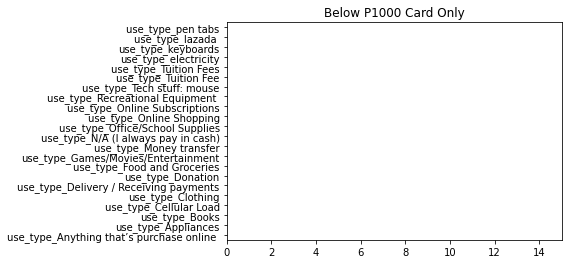

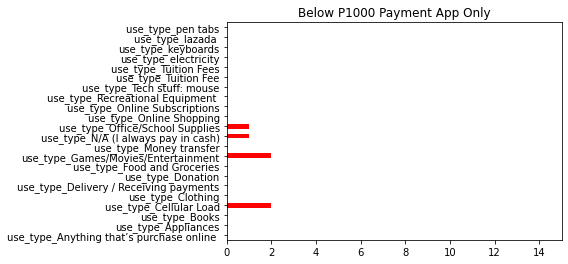

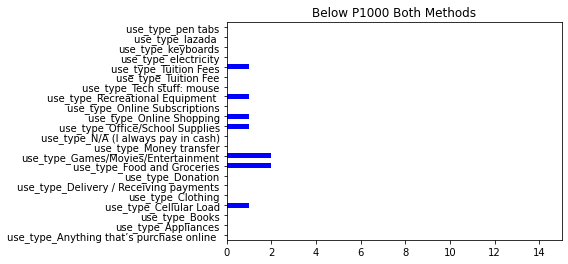

In [ ]:
_999card[use_type_columns].sum().plot.barh(color='green')
plt.title("Below P1000 Card Only")
plt.gca().set_xlim([0, 15])
plt.show()

_999pay_app[use_type_columns].sum().plot.barh(color='red')
plt.title("Below P1000 Payment App Only")
plt.gca().set_xlim([0, 15])
plt.show()

_999both[use_type_columns].sum().plot.barh(color='blue')
plt.title("Below P1000 Both Methods")
plt.gca().set_xlim([0, 15])
plt.show()

### 1, 000 - 4, 999 bracket




In [ ]:
_1000_4999card = _1000_4999[(_1000_4999['card_use'] == 'Yes') &( _1000_4999['pay_app_use'] == 'No')]
_1000_4999card

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
4,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,No,NaN,1 - 4,5 - 7,"Supermarkets, Department Stores, Appliance Cen...",6,It is less hassle to bring cash and it would a...,It would be hard for those who don’t have any ...,"Supermarkets, Convenience Stores, Department S...",0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,Male,Undergraduate,Public School / University,"1,000 - 4,999",Yes,5 - 7,No,NaN,5 - 7,> 15,"Supermarkets, Department Stores, Appliance Cen...",8,"In this time, amidst a global pandemic, it is ...",I think it may make people generally less fina...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54,Female,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,No,NaN,0 (I always pay in cash),8 - 10,"Supermarkets, Convenience Stores, Sari-sari st...",7,Fast and easy transactions,Prone to hacking and very dependent on the ava...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
_1000_4999pay_app = _1000_4999[(_1000_4999['card_use'] == 'No') &( _1000_4999['pay_app_use'] == 'Yes')]
_1000_4999pay_app

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
5,Male,Undergraduate,Private School / University,"1,000 - 4,999",No,NaN,Yes,1 - 4,1 - 4,5 - 7,"Supermarkets, Convenience Stores, Department S...",7,Convenience,Errors in the system,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11,Male,Undergraduate,Private School / University,"1,000 - 4,999",No,NaN,Yes,1 - 4,0 (I always pay in cash),5 - 7,"Supermarkets, Convenience Stores, Department S...",4,There would be less security risks especially ...,Data privacy breaches could happen leading to ...,"Public Transportation (Buses, Jeepneys, Rail S...",0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
20,Male,Undergraduate,Private School / University,"1,000 - 4,999",No,NaN,Yes,5 - 7,5 - 7,8 - 10,"Supermarkets, Convenience Stores, Department S...",4,Possibly increased sanitary effect on people b...,More dependency to the phone. It could also be...,"Supermarkets, Convenience Stores, Department S...",0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
23,Male,Undergraduate,Private School / University,"1,000 - 4,999",No,NaN,Yes,1 - 4,1 - 4,> 15,"Appliance Centers, Payment Centers, Fast Food ...",7,"If you are the seller, more people will be inc...","when you are the buyer, you will buy too much ...","Appliance Centers, Payment Centers, Fast Food ...",0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
30,Male,Undergraduate,Private School / University,"1,000 - 4,999",No,NaN,Yes,5 - 7,1 - 4,5 - 7,"Supermarkets, Convenience Stores, Department S...",7,"less physical contact, no need to bring physic...",not everyone has a cashless payment option (br...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
40,Female,Undergraduate,Private School / University,"1,000 - 4,999",No,NaN,Yes,1 - 4,1 - 4,1 - 4,"Supermarkets, Convenience Stores, Department S...",7,Convenient and efficient.,Technical difficulties that could hinder or sl...,"Supermarkets, Convenience Stores, Department S...",0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58,Female,Undergraduate,Private School / University,"1,000 - 4,999",No,NaN,Yes,8 - 10,5 - 7,N/A (I don't notice their other transaction sy...,"Supermarkets, Fast Food Chains, Food delivery ...",6,"Less contact, possible faster transactions, le...",It could be an inconvenience for a lot of peop...,"Supermarkets, Convenience Stores, Department S...",0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
_1000_4999both = _1000_4999[(_1000_4999['card_use'] == 'Yes') &( _1000_4999['pay_app_use'] == 'Yes')]
_1000_4999both

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
0,Female,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,Yes,5 - 7,5 - 7,8 - 10,"Supermarkets, Appliance Centers, Online Stores",8,More efficient and faster process,Not all are capable of using them and some are...,"Supermarkets, Convenience Stores, Payment Cent...",0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,Yes,8 - 10,5 - 7,5 - 7,"Supermarkets, Department Stores, Appliance Cen...",9,"Less human contact, especially during the pand...","Prone to it being hacked, delay in arrival of ...","Supermarkets, Department Stores, Appliance Cen...",0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
6,Female,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,Yes,1 - 4,1 - 4,5 - 7,"Supermarkets, Convenience Stores, Department S...",7,"More secure, available for obtaining promos",Personal information theft,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
7,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,Yes,8 - 10,8 - 10,1 - 4,"Supermarkets, Convenience Stores, Fast Food Ch...",8,Fast transactions,Need wifi to access it / reloading the balance,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,5 - 7,Yes,5 - 7,1 - 4,5 - 7,"Supermarkets, Convenience Stores, Department S...",7,No need for change because you always pay yhe ...,"When you lose your card, it can be a hassle wh...","Supermarkets, Convenience Stores, Department S...",0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
16,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,Yes,1 - 4,1 - 4,> 15,"Convenience Stores, Payment Centers, Fast Food...",10,Less contact especially in the pandemic. Less ...,Hacking if the applications are not secure. Mo...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,Yes,5 - 7,5 - 7,1 - 4,"Convenience Stores, Department Stores, Payment...",5,"Convenience to user, hygiene, payment tracing","Security systems being breached, data privacy","Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
24,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,Yes,1 - 4,1 - 4,11 - 14,"Supermarkets, Convenience Stores, Department S...",10,"Contact-free, minimalist lifestyle. No need to...",Too many eggs in one basket. One lost debit ca...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
31,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,5 - 7,Yes,8 - 10,8 - 10,8 - 10,"Convenience Stores, Fast Food Chains, Food del...",5,You don't have to carry a lot of money on you....,"Fraud might be easily implemented, one's accou...","Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
32,Male,Undergraduate,Private School / University,"1,000 - 4,999",Yes,1 - 4,Yes,1 - 4,1 - 4,5 - 7,"Supermarkets, Department Stores, Appliance Cen...",8,has 

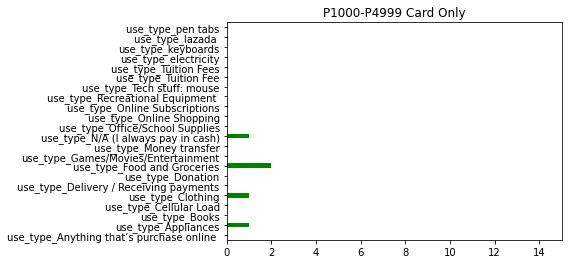

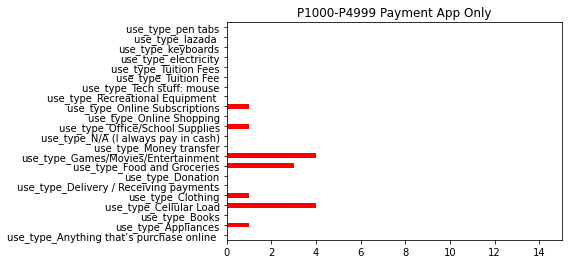

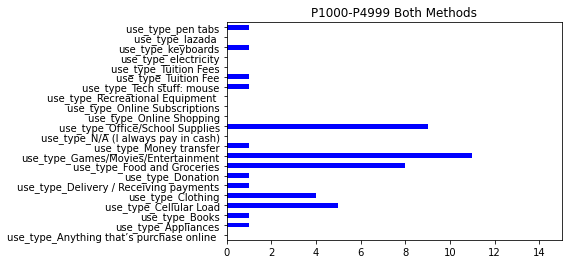

In [ ]:
_1000_4999card[use_type_columns].sum().plot.barh(color='green')
plt.title("P1000-P4999 Card Only")
plt.gca().set_xlim([0, 15])
plt.show()

_1000_4999pay_app[use_type_columns].sum().plot.barh(color='red')
plt.title("P1000-P4999 Payment App Only")
plt.gca().set_xlim([0, 15])
plt.show()

_1000_4999both[use_type_columns].sum().plot.barh(color='blue')
plt.title("P1000-P4999 Both Methods")
plt.gca().set_xlim([0, 15])
plt.show()

### 5, 000 - 7, 999 bracket

In [ ]:
_5000_7999card = _5000_7999[(_5000_7999['card_use'] == 'Yes') &( _5000_7999['pay_app_use'] == 'No')]
_5000_7999card

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs


In [ ]:
_5000_7999pay_app = _5000_7999[(_5000_7999['card_use'] == 'No') &( _5000_7999['pay_app_use'] == 'Yes')]
_5000_7999pay_app

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
8,Male,Undergraduate,Private School / University,"5,000 - 7,999",No,NaN,Yes,8 - 10,8 - 10,8 - 10,"Supermarkets, Convenience Stores, Payment Cent...",8,no physical contact. less time wasted,relies heavily on internet if online,"Supermarkets, Convenience Stores, Department S...",0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,Male,Undergraduate,Private School / University,"5,000 - 7,999",No,NaN,Yes,1 - 4,1 - 4,> 15,"Supermarkets, Convenience Stores, Department S...",8,"Transactions are made easier, since the factor...","Since we're relying on technology, we cannot a...","Supermarkets, Convenience Stores, Department S...",0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
_5000_7999both = _5000_7999[(_5000_7999['card_use'] == 'Yes') &( _5000_7999['pay_app_use'] == 'Yes')]
_5000_7999both

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
10,Female,Undergraduate,Private School / University,"5,000 - 7,999",Yes,5 - 7,Yes,8 - 10,8 - 10,> 15,"Supermarkets, Convenience Stores, Department S...",9,I think it lessen the bacterial spread of covi...,I think it's plausible to hacks and stealing,"Supermarkets, Convenience Stores, Department S...",0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
13,Male,Undergraduate,Private School / University,"5,000 - 7,999",Yes,1 - 4,Yes,1 - 4,1 - 4,1 - 4,"Supermarkets, Convenience Stores, Department S...",8,You don't need to carry cash/coins everywhere ...,"Security, not a lot of places provide free pub...","Supermarkets, Convenience Stores, Department S...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
14,Female,Undergraduate,Private School / University,"5,000 - 7,999",Yes,1 - 4,Yes,5 - 7,8 - 10,1 - 4,"Supermarkets, Convenience Stores, Department S...",8,"quicker transactions, safer, more convenient w...","establishments may impose larger fees, the poo...","Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,Female,Undergraduate,Private School / University,"5,000 - 7,999",Yes,1 - 4,Yes,5 - 7,1 - 4,> 15,"Supermarkets, Convenience Stores, Department S...",8,"Convenience, less contraction/passing of disea...","Forgery, Send money to wrong people, accidenta...","Supermarkets, Convenience Stores, Department S...",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,Male,Undergraduate,Private School / University,"5,000 - 7,999",Yes,1 - 4,Yes,1 - 4,1 - 4,5 - 7,"Supermarkets, Convenience Stores, Department S...",6,"convenience, less exposure to contract virus",cyber security issues,"Supermarkets, Convenience Stores, Department S...",0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
29,Male,Undergraduate,Private School / University,"5,000 - 7,999",Yes,5 - 7,Yes,1 - 4,5 - 7,1 - 4,"Supermarkets, Department Stores, Appliance Cen...",8,Less hassle. No need to carry cash all the time,Not all stores accommodate cashless transactions.,"Supermarkets, Convenience Stores, Department S...",0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
42,Female,Undergraduate,Private School / University,"5,000 - 7,999",Yes,8 - 10,Yes,> 15,> 15,> 15,"Supermarkets, Convenience Stores, Department S...",8,Safe and contactless payments,Those who do not have the right means to acqui...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
51,Female,Undergraduate,Private School / University,"5,000 - 7,999",Yes,1 - 4,Yes,5 - 7,1 - 4,1 - 4,Online Stores,9,Less hassle because there is no need to withdr...,Scam,"Payment Centers, Food Delivery Services, Onlin...",0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
59,Male,Undergraduate,Private School / University,"5,000 - 7,999",Yes,1 - 4,Yes,5 - 7,5 - 7,1 - 4,"Food delivery services, Online Stores",7,"With the pandemic, less contact between person...",It forces everyone to adapt and to have consta...,"Supermarkets, Convenience Stores, Department S...",0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
64,Male,Undergraduate,Private School / University,"5,000 - 7,999",Yes,1 - 4,Yes,5 - 7,1 - 4,5 - 7,"Supermarkets, Convenience Stores, Sari-sari st...",6,"Given the pandemic, it would help have less co...",Sometimes it is de

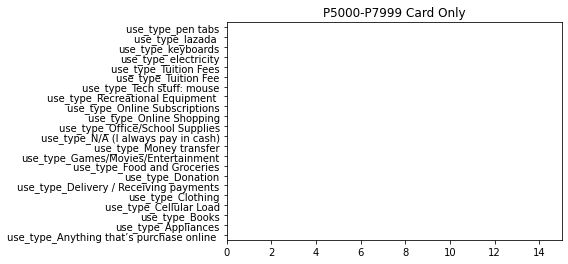

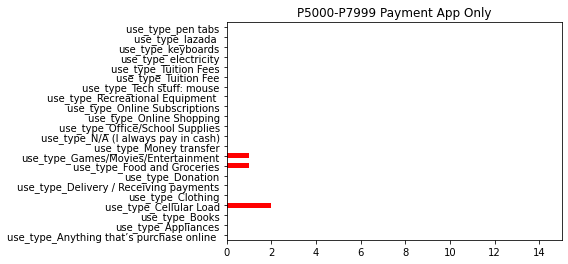

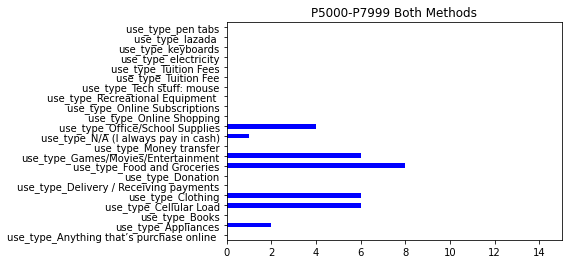

In [ ]:
_5000_7999card[use_type_columns].sum().plot.barh(color='green')
plt.title("P5000-P7999 Card Only")
plt.gca().set_xlim([0, 15])
plt.show()

_5000_7999pay_app[use_type_columns].sum().plot.barh(color='red')
plt.title("P5000-P7999 Payment App Only")
plt.gca().set_xlim([0, 15])
plt.show()

_5000_7999both[use_type_columns].sum().plot.barh(color='blue')
plt.title("P5000-P7999 Both Methods")
plt.gca().set_xlim([0, 15])
plt.show()

### 8, 000 - 11, 999 bracket

In [ ]:
_8000_11999card = _8000_11999[(_8000_11999['card_use'] == 'Yes') &( _8000_11999['pay_app_use'] == 'No')]
_8000_11999card

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs


In [ ]:
_8000_11999pay_app = _8000_11999[(_8000_11999['card_use'] == 'No') &( _8000_11999['pay_app_use'] == 'Yes')]
_8000_11999pay_app

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
12,Female,Undergraduate,Private School / University,"8,000 - 11,999",No,NaN,Yes,1 - 4,1 - 4,5 - 7,"Convenience Stores, Department Stores, Payment...",8,Hard to be stolen,Might get hacked,most have cashless maybe sari sari but i think...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
38,Male,Undergraduate,Private School / University,"8,000 - 11,999",No,NaN,Yes,1 - 4,5 - 7,5 - 7,"Supermarkets, Convenience Stores, Department S...",9,Seamless transactions and more systematic way ...,"For me, none since if more people use cashless...","Supermarkets, Convenience Stores, Payment Cent...",0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
_8000_11999both = _8000_11999[(_8000_11999['card_use'] == 'Yes') &( _8000_11999['pay_app_use'] == 'Yes')]
_8000_11999both

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
3,Female,Undergraduate,Private School / University,"8,000 - 11,999",Yes,1 - 4,Yes,11 - 14,11 - 14,8 - 10,"Supermarkets, Convenience Stores, Department S...",6,"Society can progress, and more attention can b...",People would have to adjust to the new norm. T...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
26,Female,Undergraduate,Private School / University,"8,000 - 11,999",Yes,5 - 7,Yes,5 - 7,1 - 4,> 15,"Supermarkets, Department Stores, Appliance Cen...",5,It will be easier to track the expenses and th...,Not everyone can readily use cashless systems,"Supermarkets, Convenience Stores, Department S...",0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
27,Female,Undergraduate,Private School / University,"8,000 - 11,999",Yes,11 - 14,Yes,11 - 14,8 - 10,11 - 14,"Supermarkets, Convenience Stores, Department S...",8,The transactions are more convenient,Increased exposure to theft,"Supermarkets, Department Stores, Payment Cente...",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,Female,Undergraduate,Public School / University,"8,000 - 11,999",Yes,5 - 7,Yes,1 - 4,0 (I always pay in cash),N/A (I don't notice their other transaction sy...,"Supermarkets, Convenience Stores, Department S...",8,i can say that it's hygienic since the bills m...,privacy theft i suppose,"Public Transportation (Buses, Jeepneys, Rail S...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
45,Female,Undergraduate,Private School / University,"8,000 - 11,999",Yes,1 - 4,Yes,8 - 10,> 15,5 - 7,"Supermarkets, Department Stores, Appliance Cen...",7,it could be more easier and less possibility o...,cash in may not be available at all times,"Supermarkets, Convenience Stores, Department S...",0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
46,Female,Undergraduate,Public School / University,"8,000 - 11,999",Yes,1 - 4,Yes,5 - 7,1 - 4,5 - 7,"Supermarkets, Department Stores, Appliance Cen...",6,easier transactions when both have the same ca...,"when cashless transactions are mostly done, th...","Supermarkets, Convenience Stores, Department S...",0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
61,Male,Undergraduate,Private School / University,"8,000 - 11,999",Yes,5 - 7,Yes,1 - 4,5 - 7,8 - 10,"Supermarkets, Payment Centers, Fast Food Chain...",8,Increased security by preventing counterfeit b...,When cashless systems are down people cannot m...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


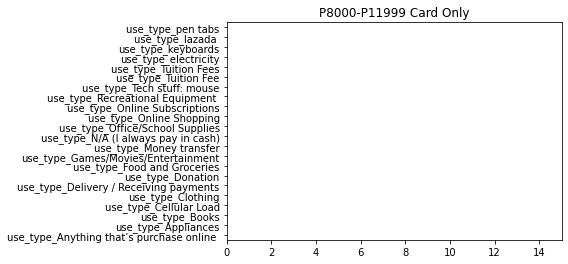

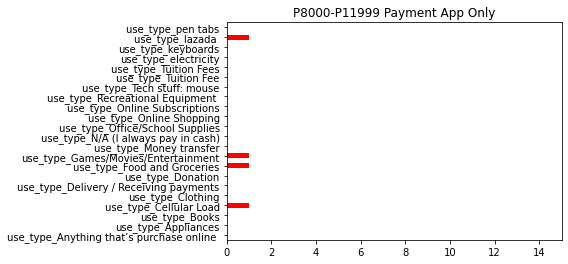

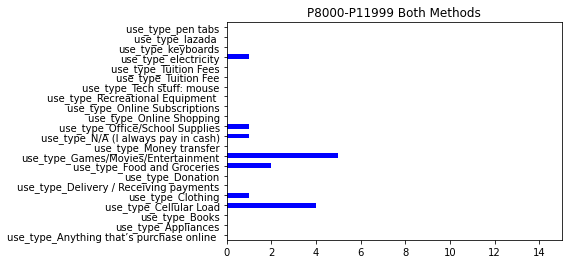

In [ ]:
_8000_11999card[use_type_columns].sum().plot.barh(color='green')
plt.title("P8000-P11999 Card Only")
plt.gca().set_xlim([0, 15])
plt.show()

_8000_11999pay_app[use_type_columns].sum().plot.barh(color='red')
plt.title("P8000-P11999 Payment App Only")
plt.gca().set_xlim([0, 15])
plt.show()

_8000_11999both[use_type_columns].sum().plot.barh(color='blue')
plt.title("P8000-P11999 Both Methods")
plt.gca().set_xlim([0, 15])
plt.show()

### 12, 000 - 14, 999 bracket

In [ ]:
_12000_14999card = _12000_14999[(_12000_14999['card_use'] == 'Yes') &( _12000_14999['pay_app_use'] == 'No')]
_12000_14999card

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
35,Male,Undergraduate,Private School / University,"12,000 - 14,999",Yes,1 - 4,No,1 - 4,1 - 4,5 - 7,"Supermarkets, Convenience Stores, Sari-sari st...",8,Cashless transactions are good because of its ...,The security of implementation must be verifie...,"Supermarkets, Convenience Stores, Sari-sari St...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
_12000_14999pay_app = _12000_14999[(_12000_14999['card_use'] == 'No') &( _12000_14999['pay_app_use'] == 'Yes')]
_12000_14999pay_app

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
48,Female,Undergraduate,Private School / University,"12,000 - 14,999",No,NaN,Yes,1 - 4,1 - 4,8 - 10,"Supermarkets, Convenience Stores, Department S...",6,"Less contact (esp progress of pandemic), conve...","Fraud, easier to hack/steal, older generations...","Supermarkets, Convenience Stores, Sari-sari St...",1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
_12000_14999both = _12000_14999[(_12000_14999['card_use'] == 'Yes') &( _12000_14999['pay_app_use'] == 'Yes')]
_12000_14999both

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
34,Male,Undergraduate,Private School / University,"12,000 - 14,999",Yes,NaN,Yes,1 - 4,0 (I always pay in cash),N/A (I don't notice their other transaction sy...,"Restaurants, Food delivery services, Online St...",8,You won't have to worry about having to receiv...,Needing the connection to the internet and a p...,"Supermarkets, Convenience Stores, Payment Cent...",0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


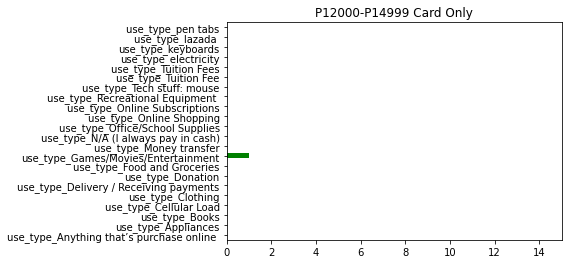

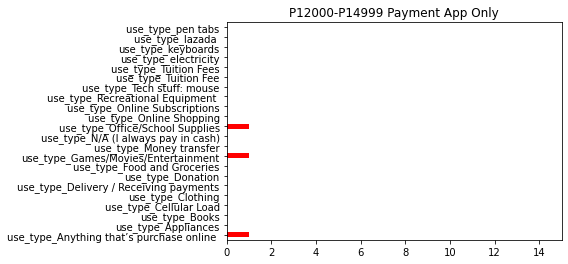

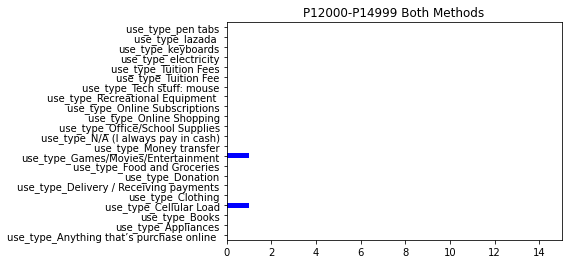

In [ ]:
_12000_14999card[use_type_columns].sum().plot.barh(color='green')
plt.title("P12000-P14999 Card Only")
plt.gca().set_xlim([0, 15])
plt.show()

_12000_14999pay_app[use_type_columns].sum().plot.barh(color='red')
plt.title("P12000-P14999 Payment App Only")
plt.gca().set_xlim([0, 15])
plt.show()

_12000_14999both[use_type_columns].sum().plot.barh(color='blue')
plt.title("P12000-P14999 Both Methods")
plt.gca().set_xlim([0, 15])
plt.show()

### 15, 000 - 19, 999 bracket

In [ ]:
_15000_19999card = _15000_19999[(_15000_19999['card_use'] == 'Yes') &( _15000_19999['pay_app_use'] == 'No')]
_15000_19999card

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs


In [ ]:
_15000_19999pay_app = _15000_19999[(_15000_19999['card_use'] == 'No') &( _15000_19999['pay_app_use'] == 'Yes')]
_15000_19999pay_app

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
33,Female,Undergraduate,Private School / University,"15,000 - 19,999",No,NaN,Yes,1 - 4,0 (I always pay in cash),5 - 7,"Supermarkets, Fast Food Chains, Food delivery ...",9,It is more convenient and it is faster to tran...,There could be delays when sending cash especi...,"Supermarkets, Convenience Stores, Payment Cent...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
41,Male,Undergraduate,Public School / University,"15,000 - 19,999",No,NaN,Yes,1 - 4,1 - 4,5 - 7,"Supermarkets, Department Stores, Appliance Cen...",8,Lessen the interaction and time for long queue,"Scamers, slow internet connection, and not all...","Supermarkets, Restaurants",0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
_15000_19999both = _15000_19999[(_15000_19999['card_use'] == 'Yes') &( _15000_19999['pay_app_use'] == 'Yes')]
_15000_19999both

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
47,Female,Undergraduate,Private School / University,"15,000 - 19,999",Yes,5 - 7,Yes,> 15,> 15,1 - 4,"Supermarkets, Convenience Stores, Department S...",8,Easy access,Hacking,"Supermarkets, Convenience Stores, Department S...",0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55,Female,Undergraduate,Private School / University,"15,000 - 19,999",Yes,1 - 4,Yes,5 - 7,5 - 7,1 - 4,"Payment Centers, Food delivery services, Onlin...",8,"Easy to use, fast, no contact","System errors, will be hard for some people to...","Department Stores, Appliance Centers, Payment ...",0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


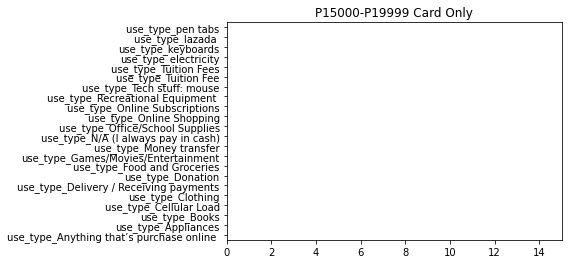

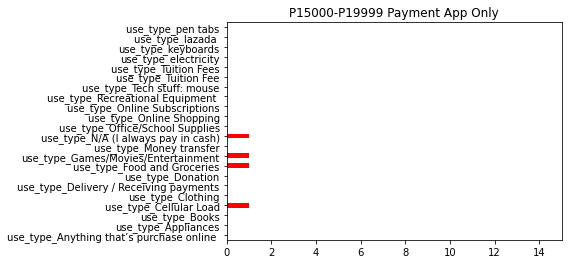

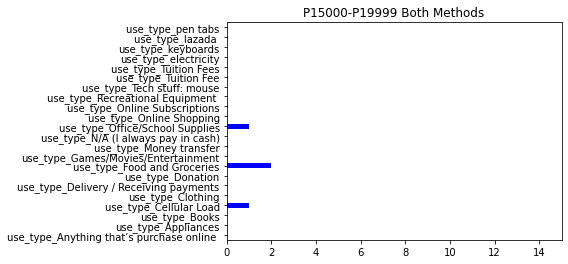

In [ ]:
_15000_19999card[use_type_columns].sum().plot.barh(color='green')
plt.title("P15000-P19999 Card Only")
plt.gca().set_xlim([0, 15])
plt.show()

_15000_19999pay_app[use_type_columns].sum().plot.barh(color='red')
plt.title("P15000-P19999 Payment App Only")
plt.gca().set_xlim([0, 15])
plt.show()

_15000_19999both[use_type_columns].sum().plot.barh(color='blue')
plt.title("P15000-P19999 Both Methods")
plt.gca().set_xlim([0, 15])
plt.show()

### 20, 000 - 25, 000 bracket

### 25, 000 and above bracket

In [ ]:
_25000

,Sex,Current Level of Education,Type of Institution,allowance,card_use,card_usage,pay_app_use,pay_app_usage,cashless_usage,cashless_encounter,cashless_implement,rating,advantages,disadvantages,cashless_implement_want,use_type_Anything that’s purchase online,use_type_Appliances,use_type_Books,use_type_Cellular Load,use_type_Clothing,use_type_Delivery / Receiving payments,use_type_Donation,use_type_Food and Groceries,use_type_Games/Movies/Entertainment,use_type_Money transfer,use_type_N/A (I always pay in cash),use_type_Office/School Supplies,use_type_Online Shopping,use_type_Online Subscriptions,use_type_Recreational Equipment,use_type_Tech stuff: mouse,use_type_Tuition Fee,use_type_Tuition Fees,use_type_electricity,use_type_keyboards,use_type_lazada,use_type_pen tabs
43,Male,Undergraduate,Private School / University,"25,000 and above",No,NaN,Yes,1 - 4,1 - 4,1 - 4,"Supermarkets, Convenience Stores, Department S...",6,It would be more efficient for the people and ...,People who are not aware or in the bottom clas...,"Supermarkets, Convenience Stores, Department S...",0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


## Rating vs Frequency Trend


In [ ]:
from sklearn import preprocessing

df = responses_df[['cashless_usage', 'rating']].sort_values(by="cashless_usage")
df = df.groupby(['cashless_usage']).mean()
df = df.loc[['1 - 4', '5 - 7', '8 - 10', '11 - 14', '> 15']]
df

,rating
cashless_usage,
1 - 4,7.406250
5 - 7,7.272727
8 - 10,7.333333
11 - 14,6.000000
> 15,7.750000


In [ ]:
# Normalize
x = df[['rating']].values.astype(float)
x_scaled = preprocessing.scale(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized = df_normalized.rename(columns={0:'avg_rating'})

In [ ]:
rating_norm = pd.Series(df_normalized['avg_rating'])
df['rating_normalized'] = pd.Series(rating_norm.values, index=df.index) 

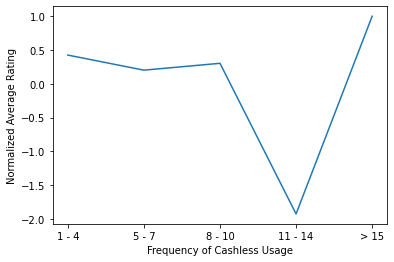

In [ ]:
plt.xlabel('Frequency of Cashless Usage')
plt.ylabel('Normalized Average Rating')
plt.plot(df['rating_normalized'])

## Difference of Current and Expected Implementation

In [ ]:
implement_sum_df = pd.DataFrame(one_hot_implement.sum())
implement_sum_df.reset_index(level=0, inplace=True)
implement_sum_df.rename(columns={"index": "estab", 0 : "count"}, inplace=True)
implement_sum_df['establishment'] = implement_sum_df['estab'].str[10:].str.lower()
implement_sum_df.drop(columns=['estab'], inplace=True)
implement_sum_df

,count,establishment
0,40,appliance centers
1,43,convenience stores
2,50,department stores
3,47,fast food chains
4,62,food delivery services
5,24,jeepneys
6,65,online stores
7,45,payment centers
8,28,private transportation (taxis
9,24,public transportation (buses


In [ ]:
want_sum_df = pd.DataFrame(one_hot_want.sum())
want_sum_df.reset_index(level=0, inplace=True)
want_sum_df.rename(columns={"index": "estab", 0 : "count"}, inplace=True)
want_sum_df['establishment'] = want_sum_df['estab'].str[15:].str.lower()
want_sum_df.drop(columns=['estab'], inplace=True)
want_sum_df

,count,establishment
0,50,appliance centers
1,55,convenience stores
2,54,department stores
3,1,donation drives
4,58,fast food chains
5,58,food delivery services
6,51,jeepneys
7,61,online stores
8,57,payment centers
9,1,pharmacies


In [ ]:
want_sum_df[want_sum_df['count']==1]

,count,establishment
3,1,donation drives
9,1,pharmacies
15,1,schools
18,1,most have cashless maybe sari sari but i think...


In [ ]:
others = {
    "count": 3, 
    "establishment": "others"
}
want_sum_df.at[14, 'count'] = 30
want_sum_df.drop([3, 9, 15, 18], inplace=True)
want_sum_df = want_sum_df.append(others, ignore_index=True)
want_sum_df

,count,establishment
0,50,appliance centers
1,55,convenience stores
2,54,department stores
3,58,fast food chains
4,58,food delivery services
5,51,jeepneys
6,61,online stores
7,57,payment centers
8,57,private transportation (taxis
9,51,public transportation (buses


In [ ]:
combined_df = pd.concat([implement_sum_df, want_sum_df], ignore_index=True, sort=False, axis=1)
combined_df

,0,1,2,3
0,40.0,appliance centers,50,appliance centers
1,43.0,convenience stores,55,convenience stores
2,50.0,department stores,54,department stores
3,47.0,fast food chains,58,fast food chains
4,62.0,food delivery services,58,food delivery services
5,24.0,jeepneys,51,jeepneys
6,65.0,online stores,61,online stores
7,45.0,payment centers,57,payment centers
8,28.0,private transportation (taxis,57,private transportation (taxis
9,24.0,public transportation (buses,51,public transportation (buses


In [ ]:
combined_df.drop(columns=[1], inplace=True)
combined_df.rename(columns={0: "implement count", 2 : "want count", 3 : "establishment"}, inplace=True)
combined_df.set_index("establishment", inplace=True)
combined_df

,implement count,want count
establishment,,
appliance centers,40.0,50
convenience stores,43.0,55
department stores,50.0,54
fast food chains,47.0,58
food delivery services,62.0,58
jeepneys,24.0,51
online stores,65.0,61
payment centers,45.0,57
private transportation (taxis,28.0,57


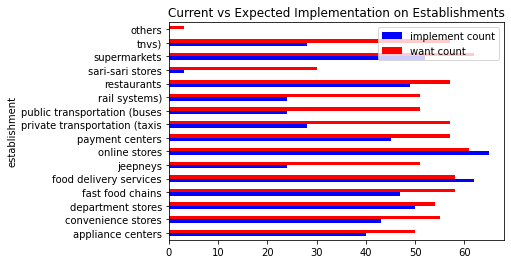

In [ ]:
combined_df.plot.barh(color=["blue","red"])
plt.title("Current vs Expected Implementation on Establishments")
plt.gca().set_xlim([0, 68])
plt.show()

In [ ]:
combined_df['difference'] = combined_df['want count'] - combined_df['implement count']
combined_df['positivediff'] = combined_df['difference'] > 0
combined_df

,implement count,want count,difference,positivediff
establishment,,,,
appliance centers,40.0,50,10.0,True
convenience stores,43.0,55,12.0,True
department stores,50.0,54,4.0,True
fast food chains,47.0,58,11.0,True
food delivery services,62.0,58,-4.0,False
jeepneys,24.0,51,27.0,True
online stores,65.0,61,-4.0,False
payment centers,45.0,57,12.0,True
private transportation (taxis,28.0,57,29.0,True


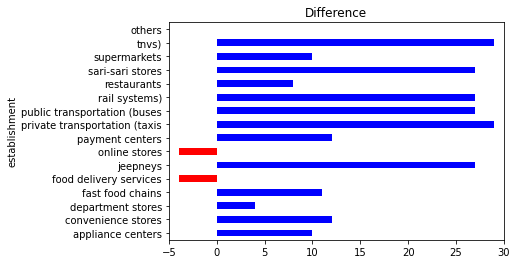

In [ ]:
combined_df['difference'].plot.barh(color=combined_df.positivediff.map({True: 'blue', False: 'red'}))
plt.title("Difference")
plt.gca().set_xlim([-5, 30])
plt.show()

# Opinions Analysis

In [ ]:
adv = opinions_df.iloc[:,-3:-2]
disadv = opinions_df.iloc[:,-2:-1]

In [ ]:
adv

,advantages
0,More efficient and faster process
1,There's the convenience of having your money d...
2,"Less human contact, especially during the pand..."
3,"Society can progress, and more attention can b..."
4,It is less hassle to bring cash and it would a...
...,...
63,"Given the current pandemic, it lessens the tra..."
64,"Given the pandemic, it would help have less co..."
65,"Convenient and since it's the pandemic period,..."
66,More hygienic and efficient (no need to waste ...


In [ ]:
disadv

,disadvantages
0,Not all are capable of using them and some are...
1,There's both an upside and downside to securit...
2,"Prone to it being hacked, delay in arrival of ..."
3,People would have to adjust to the new norm. T...
4,It would be hard for those who don’t have any ...
...,...
63,The time it takes to verify the transactions m...
64,Sometimes it is dependent on the net and the a...
65,It's hard for those who don't have mobile phon...
66,Dependency on the more known companies may cre...


In [ ]:
sw = stopwords.words('english')
#The function
def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    #Remove stopwords
    text = [w for w in text if w not in sw]
    return text

In [ ]:
adv['advantages'] = adv['advantages'].apply(lambda x: clean_text(x))

In [ ]:
disadv['disadvantages'] = disadv['disadvantages'].apply(lambda x: clean_text(x))

In [ ]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

In [ ]:
adv['advantages'] = adv['advantages'].apply(lambda x: lemmatize_sentence(x))

In [ ]:
disadv['disadvantages'] = disadv['disadvantages'].apply(lambda x: lemmatize_sentence(x))

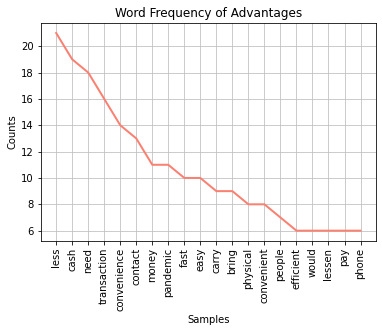

In [ ]:

all_words_advantages=[]        
for i in range(len(adv)):
    all_words_advantages= all_words_advantages + adv['advantages'][i]
#Get word frequency        
nlp_words = nltk.FreqDist(all_words_advantages)
plot1 = nlp_words.plot(20, color='salmon', title='Word Frequency of Advantages')

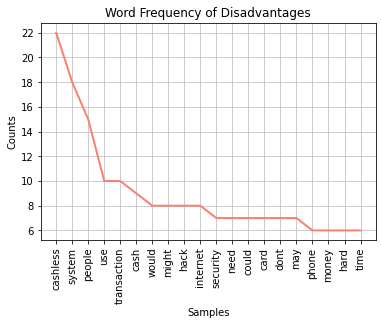

In [ ]:
  
all_words_disadvantages=[]        
for i in range(len(adv)):
    all_words_disadvantages = all_words_disadvantages + disadv['disadvantages'][i]
#Get word frequency        
nlp_words = nltk.FreqDist(all_words_disadvantages)
plot1 = nlp_words.plot(20, color='salmon', title='Word Frequency of Disadvantages')

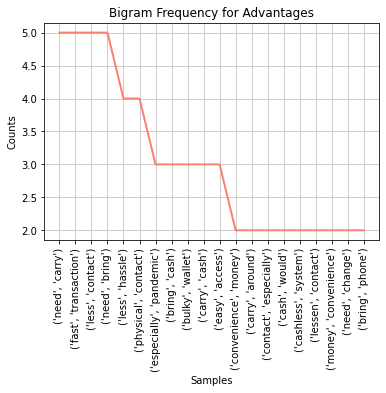

In [ ]:
#Bigrams
bigrm = list(nltk.bigrams(all_words_advantages))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency for Advantages')

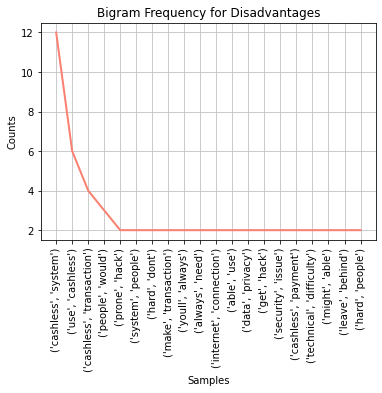

In [ ]:
#Bigrams
bigrm = list(nltk.bigrams(all_words_disadvantages))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency for Disadvantages')

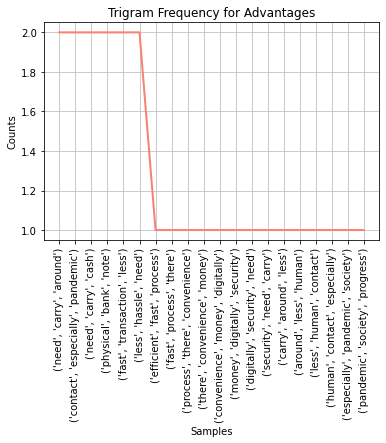

In [ ]:
#Trigrams
trigrm = list(nltk.trigrams(all_words_advantages))
words_2 = nltk.FreqDist(trigrm)
words_2.plot(20, color='salmon', title='Trigram Frequency for Advantages')

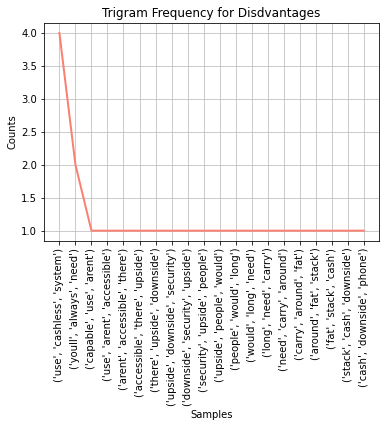

In [ ]:
#Trigrams
trigrm = list(nltk.trigrams(all_words_disadvantages))
words_2 = nltk.FreqDist(trigrm)
words_2.plot(20, color='salmon', title='Trigram Frequency for Disdvantages')